In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('movies_success.csv', sep=',')

In [3]:
average_profit = data[data['made_profit']==True]
average_noprofit = data[data['made_profit']==False]

### Histograms

(array([111.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 625.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

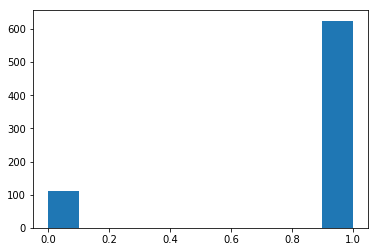

In [4]:
plt.hist(data['made_profit'])

(array([ 1.,  0.,  1.,  3., 11., 34., 25., 23.,  9.,  4.]),
 array([1.5 , 1.78, 2.06, 2.34, 2.62, 2.9 , 3.18, 3.46, 3.74, 4.02, 4.3 ]),
 <a list of 10 Patch objects>)

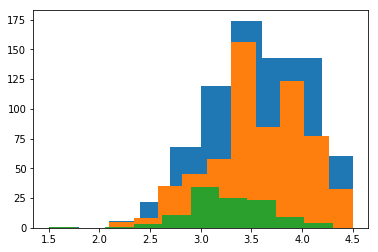

In [5]:
plt.hist(data['audience_average'])
plt.hist(average_profit['audience_average'])
plt.hist(average_noprofit['audience_average'])

(array([ 1.,  2.,  5.,  8., 21., 25., 17., 19.,  9.,  4.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

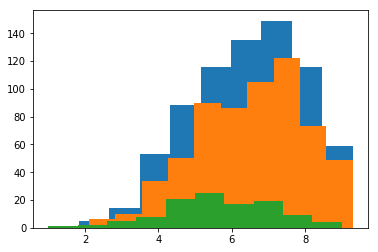

In [6]:
plt.hist(data['critic_average'])
plt.hist(average_profit['critic_average'])
plt.hist(average_noprofit['critic_average'])

In [7]:
#plt.hist(data['genre'])

### Statistical Tests

In [8]:
norm1 = stats.normaltest(data['critic_average']).pvalue
norm2 = stats.normaltest(data['audience_average']).pvalue
print("Normality Tests\nCritic Average pvalue: %0.03g  Audience Average pvalue: %0.03g" % (norm1,norm2))

Normality Tests
Critic Average pvalue: 6.21e-06  Audience Average pvalue: 0.00127


(array([ 14.,  53.,  94., 116., 100., 117., 113.,  57.,  50.,  22.]),
 array([ 1.   ,  9.549, 18.098, 26.647, 35.196, 43.745, 52.294, 60.843,
        69.392, 77.941, 86.49 ]),
 <a list of 10 Patch objects>)

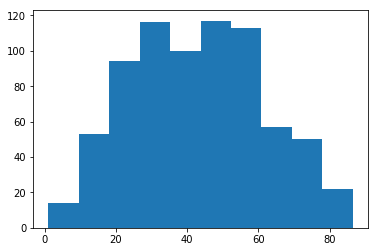

In [9]:
#transforming critic_average data by squaring makes it look normal, still fails normality test
#probably because the number of data points > 40
plt.hist(data['critic_average']**2)


#transforming audience_average data by squaring makes it look normal, still fails normality test
#plt.hist(data['audience_average']**2)

In [10]:
#Levene Test

levene1 = stats.levene(average_profit['audience_average'],average_noprofit['audience_average']).pvalue
levene2 = stats.levene(average_profit['critic_average'],average_noprofit['critic_average']).pvalue

print("Variance between profit and profit\nAudience: %0.03g, Critic: %0.03g" % (levene1,levene2))
#Can conclude that both groups have equal variance

Variance between profit and profit
Audience: 0.0781, Critic: 0.939


In [11]:
#T-test
#Are the means different for audience and critic reviews between movies that made profit and no profit?
#Yes as it turns out (p << 0.05)

stats.ttest_ind(average_profit['audience_average'],average_noprofit['audience_average']).pvalue
#stats.ttest_ind(average_profit['critic_average'],average_noprofit['critic_average']).pvalue
#stats.ttest_ind(average_profit['audience_average'],average_profit['critic_average']).pvalue
#stats.ttest_ind(average_noprofit['audience_average'],average_profit['critic_average']).pvalue

4.856133018674203e-11

### Chi-Squared Test

In [12]:
genre_success = data[['genre','made_profit','audience_average','critic_average']]
x = genre_success.groupby(['genre','made_profit']).agg({'genre':'count','audience_average':'mean','critic_average':'mean'}).rename(columns={'genre': 'count'})
x = x[x['count']>5]
x = x.reset_index(level=['genre','made_profit'])
x

,genre,made_profit,count,audience_average,critic_average
0,action film,0.0,18,3.138889,4.988889
1,action film,1.0,93,3.455914,5.946237
2,adventure film,1.0,10,3.460000,6.560000
3,biographical film,0.0,9,3.611111,6.677778
4,biographical film,1.0,22,3.750000,7.004545
5,buddy film,1.0,12,3.291667,6.341667
6,comedy film,0.0,9,3.322222,5.988889
7,comedy film,1.0,54,3.357407,5.714815
8,comedy-drama,1.0,10,3.780000,7.170000
9,crime film,1.0,19,3.421053,6.478947


In [13]:
x['profit'] = x[x['made_profit']==True]['count']
x['no_profit']= x[x['made_profit']==False]['count']
p = x[x['made_profit']==True]
p = p.drop(columns=['no_profit','made_profit','count'])
np = x[x['made_profit']==False]
np = np.drop(columns=['profit','made_profit','count'])
#suffixes indicate p = profit, np = no_profit to distinguish between averages
merge = p.merge(np,how='left',on='genre', suffixes=('_p','_np')).fillna(0)
merge

,genre,audience_average_p,critic_average_p,profit,audience_average_np,critic_average_np,no_profit
0,action film,3.455914,5.946237,93.0,3.138889,4.988889,18.0
1,adventure film,3.460000,6.560000,10.0,0.000000,0.000000,0.0
2,biographical film,3.750000,7.004545,22.0,3.611111,6.677778,9.0
3,buddy film,3.291667,6.341667,12.0,0.000000,0.000000,0.0
4,comedy film,3.357407,5.714815,54.0,3.322222,5.988889,9.0
5,comedy-drama,3.780000,7.170000,10.0,0.000000,0.000000,0.0
6,crime film,3.421053,6.478947,19.0,0.000000,0.000000,0.0
7,documentary film,3.850000,7.766667,6.0,0.000000,0.000000,0.0
8,drama film,3.776364,7.223636,55.0,3.415385,6.100000,13.0
9,fantasy film,3.662500,6.570000,40.0,0.000000,0.000000,0.0


In [14]:
genre_contingency = list(merge[['profit', 'no_profit']].itertuples(index=False, name=None))
genre_critic_contingency = list(merge[['profit', 'no_profit','audience_average_p','critic_average_p','audience_average_np','critic_average_np']].itertuples(index=False, name=None))


In [15]:
#contingency table
#Note: Only counting genres with more than 5 movie with profit/no_profit
#        Profit  No_Profit
#Genre1  count
#Genre2

chi2, genre_contingency_pval, dof, expected = stats.chi2_contingency(genre_contingency)

genre_contingency_pval

3.2043166972678516e-06

In [16]:
#contingency table
#Note: Only counting genres with more than 5 movie with profit/no_profit
#  Audience_Average_Profit | Critic_Average_Profit | Profit | Audience_Average_NoProfit| Critic_Average_NoProfit| No_Profit
#Genre1  count                           count        ...
#Genre2    .
#....
#GenreN

chi2, genre_critic_contingency_pval, dof, expected = stats.chi2_contingency(genre_critic_contingency)

genre_critic_contingency_pval

3.493504056780893e-14